# 1. Airline Flights Data Analysis using Python

## 1.1 Introduction

Air travel is one of the most widely used modes of transportation in the modern world.  
With several airlines competing in the market, flight prices vary greatly based on factors such as airline type, route, travel class, number of stops, and how early the ticket is booked.  

Analyzing this data helps us understand **pricing trends, travel patterns, and performance differences among airlines**.  
These insights are valuable both for travelers (to plan economical trips) and airlines (to optimize pricing strategy).

---

### Objectives
1. Analyze variation in flight ticket prices across airlines  
2. Study the effect of booking time (`days_left`) on ticket cost  
3. Compare flight fares by class (Economy vs Business)  
4. Explore how route, duration, and stops influence ticket pricing  
5. Summarize the key insights useful for travelers and airlines

---

### Dataset Description
The dataset contains flight records with:
- **airline** – Airline company  
- **flight** – Flight number  
- **source_city** – Departure city  
- **destination_city** – Destination city  
- **departure_time** – Time category of departure  
- **stops** – Number of stops (zero/one/two)  
- **class** – Travel class (Economy / Business)  
- **duration** – Duration of flight in hours  
- **days_left** – Days left before flight when booked  
- **price** – Ticket price  


In [5]:
# 2. Importing Libraries and Loading Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# ✅ Load dataset using full path
df = pd.read_csv(r"C:\Users\hp\airlines_flights_data.csv")

# Show first 5 rows to confirm it loaded correctly
df.head()


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# 3. Data Preprocessing

Before starting the analysis, the dataset must be checked and prepared properly to ensure accuracy.  
This stage focuses on understanding the structure of the data, identifying any issues, and preparing it for further cleaning and analysis.

---

### Steps Performed:

1. **Shape and Structure:**  
   Checked the number of rows and columns to understand dataset size.

2. **Column Names:**  
   Displayed all column names to identify unwanted or repeated fields.

3. **Missing Values:**  
   Verified if any columns contain null or missing data.

4. **Duplicate Records:**  
   Checked for and removed any duplicate rows to maintain unique entries.

5. **Data Types:**  
   Reviewed data types of all columns to ensure they are correct (numeric, object, etc.).

6. **Initial Cleaning:**  
   Prepared the dataset for deeper cleaning steps such as formatting text and removing unwanted columns.

---

After these preprocessing checks, the dataset is ready for detailed cleaning and analysis in the next sections.


In [6]:
# 3. Data Preprocessing

# 1️⃣ Shape of the dataset
print("Shape of the dataset:", df.shape)

# 2️⃣ Column names
print("\nColumn names:\n", df.columns.tolist())

# 3️⃣ Display first 5 rows
print("\nFirst five rows of the dataset:")
display(df.head())

# 4️⃣ Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 5️⃣ Check for duplicate records
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

# 6️⃣ Display basic info about dataset
print("\nDataset Info:")
df.info()

# 7️⃣ Summary statistics for numeric columns
print("\nSummary statistics:")
display(df.describe())


Shape of the dataset: (300153, 12)

Column names:
 ['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']

First five rows of the dataset:


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955



Missing values in each column:
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Number of duplicate rows: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   dur

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


# 4. Data Cleaning

After basic preprocessing, we need to clean the dataset to remove any inconsistencies or unnecessary information.  
This helps improve the accuracy and readability of the analysis.

---

### Cleaning Steps Performed:

1. **Checked for Missing Values** – to ensure there are no blank entries.  
2. **Checked for Duplicate Rows** – removed repeated records if present.  
3. **Standardized Text Data** – formatted airline names and city names properly.  
4. **Removed Unwanted Columns** – dropped extra columns like *index* and *Unnamed*.  
5. **Verified Final Dataset** – confirmed that data is clean and ready for analysis.


In [7]:
# 4. Data Cleaning Operations

# 1️⃣ Check for missing values
print("Missing values in each column:\n")
print(df.isnull().sum())

# 2️⃣ Check and remove duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed.")
else:
    print("✅ No duplicates found.")

# 3️⃣ Standardize text formatting (title case and remove spaces)
text_columns = ['airline', 'source_city', 'destination_city']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()

# 4️⃣ Remove unnecessary columns
df.drop(columns=['index'], inplace=True, errors='ignore')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 5️⃣ Final check
print("\n✅ Final dataset shape:", df.shape)
df.head()


Missing values in each column:

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Number of duplicate rows: 0
✅ No duplicates found.

✅ Final dataset shape: (300153, 11)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,Spicejet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,Airasia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## 4.1 Summary After Cleaning

- The dataset is completely cleaned and formatted.  
- All duplicate and unnecessary columns have been removed.  
- Airline and city names are properly standardized.  
- No missing values are present.  

The dataset is now ready for **Exploratory Data Analysis (EDA)**.


## 5. Exploratory Data Analysis (EDA)

In this section, we explore the airlines flight dataset to understand patterns and insights. 
We analyze airline frequency, departure & arrival times distribution, variation in ticket prices, 
and comparison of prices based on class and time of booking. Visualizations are used to make the results more meaningful.


### Q1. What are the airlines in the dataset, accompanied by their frequencies?


### 5.1 Number of Airlines in the Dataset

In this step, we identify how many different airline companies are included in the dataset. 
Understanding the total count of airlines helps us know the diversity and scale of the data and also supports further analysis, such as comparing price variations across airlines.


In [18]:
# Check how many different airlines exist in the dataset
df['airline'].nunique()


6

## 5.1 Airline Names in the Dataset

In this section, we identify all the airline companies present in the dataset. 
It is important to understand the different airlines included in the data, as it helps us analyze the aviation market diversity and compare various performance factors such as pricing trends, route coverage, and class differences among different airlines.

The list of unique airline names provides a clear view of which airline operators are represented in the dataset.


In [20]:
for airline in df['airline'].unique():
    print(airline)


SpiceJet
AirAsia
Vistara
GO_FIRST
Indigo
Air_India


### 5.2 Number of Airlines and Their Frequencies

The dataset contains several airline companies operating flights. 
The following table shows each airline along with the number of flight records available for that airline in the dataset.
This helps identify which airlines dominate the dataset and which have lower representation.


In [22]:
airline_counts = df['airline'].value_counts().reset_index()
airline_counts.columns = ['Airline', 'Frequency']

# Change index to start from 1
airline_counts.index = airline_counts.index + 1

airline_counts


,Airline,Frequency
1,Vistara,127859
2,Air_India,80892
3,Indigo,43120
4,GO_FIRST,23173
5,AirAsia,16098
6,SpiceJet,9011


### 5.3 Bar Graph – Number of Flights for Each Airline

This bar graph shows how many flights are operated by each airline in the dataset.  
Different colors are used for each bar to make the comparison more clear and visually appealing.


C:\Users\hp\AppData\Local\Temp\ipykernel_17612\3239023245.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


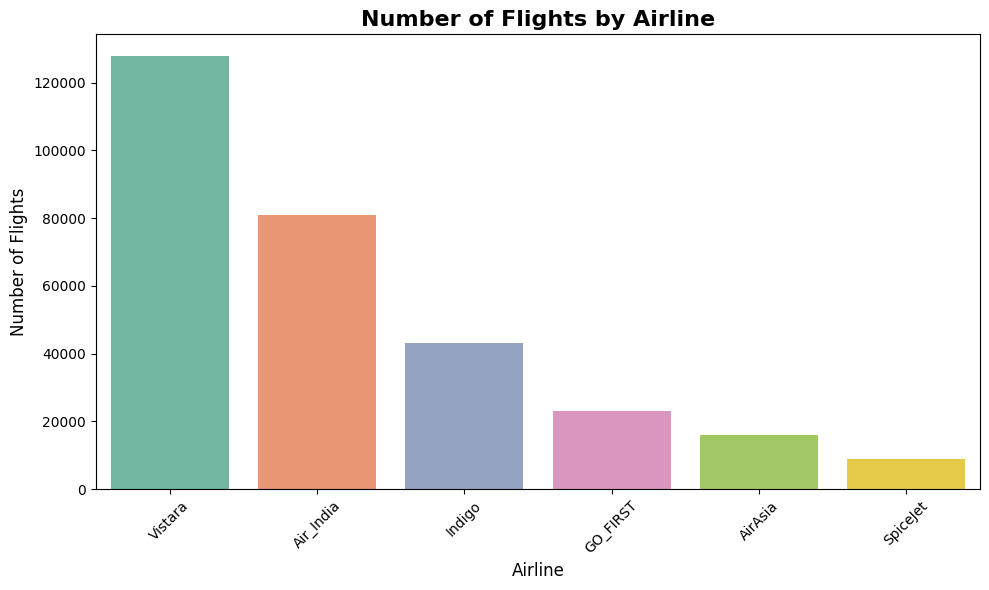

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Use seaborn barplot with different colors for each bar
sns.barplot(
    x='Airline',
    y='Frequency',
    data=airline_counts,
    palette='Set2'   # You can try 'Set1', 'Set3', 'Paired', 'viridis', etc.
)

plt.title("Number of Flights by Airline", fontsize=16, fontweight='bold')
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Q2: Bar Graphs Representing the Departure Time and Arrival Time

This analysis helps to identify the most common departure and arrival time slots for flights.
Understanding the time preferences allows airlines to optimize flight scheduling and pricing strategies.
The following bar graphs visually represent how many flights depart and arrive during different time categories.


### 5.4.1 Departure Time Frequency in Numbers

Before visualizing the distribution of departure times, we first display the number of flights for each departure time category.
This helps understand which departure time slot is most commonly preferred by passengers.


In [24]:
departure_counts = df['departure_time'].value_counts().reset_index()
departure_counts.columns = ['Departure Time', 'Frequency']
departure_counts.index = departure_counts.index + 1
departure_counts


,Departure Time,Frequency
1,Morning,71146
2,Early_Morning,66790
3,Evening,65102
4,Night,48015
5,Afternoon,47794
6,Late_Night,1306


### 5.4.2 Arrival Time Frequency in Numbers

Here we display the number of flights that arrive during each time category.
This helps identify peak arrival slots and evaluate traffic distribution throughout the day.


In [25]:
arrival_counts = df['arrival_time'].value_counts().reset_index()
arrival_counts.columns = ['Arrival Time', 'Frequency']
arrival_counts.index = arrival_counts.index + 1
arrival_counts


,Arrival Time,Frequency
1,Night,91538
2,Evening,78323
3,Morning,62735
4,Afternoon,38139
5,Early_Morning,15417
6,Late_Night,14001


### 5.4.3 Bar Graphs of Departure Time and Arrival Time

The following bar charts represent the number of flights by departure and arrival time categories.
These visualizations help identify peak travel hours and demand patterns across time slots.


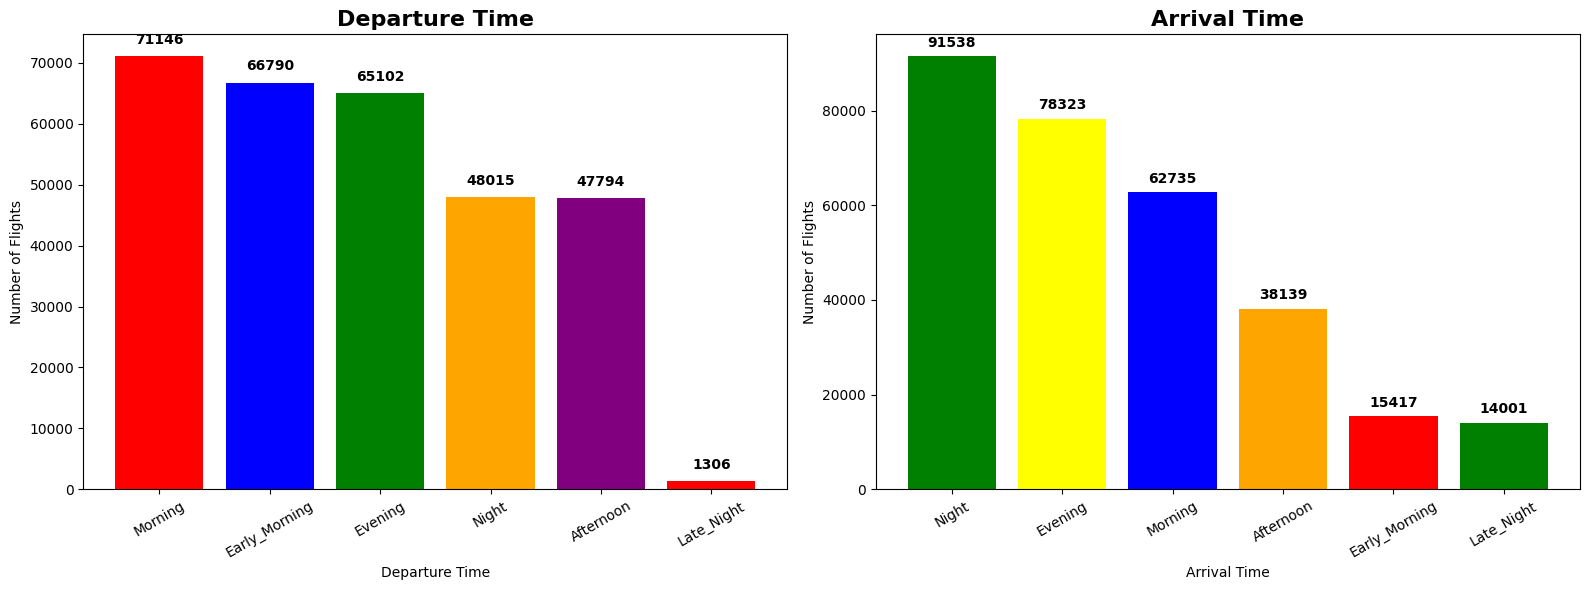

In [28]:
import matplotlib.pyplot as plt

# Data values for departure and arrival counts
departure_counts = df['departure_time'].value_counts()
arrival_counts = df['arrival_time'].value_counts()

plt.figure(figsize=(16,6))

# ------------------------ Departure Time Chart ------------------------
plt.subplot(1, 2, 1)
plt.bar(departure_counts.index, departure_counts.values, 
        color=['red', 'blue', 'green', 'orange', 'purple'])
plt.title("Departure Time", fontsize=16, fontweight='bold')
plt.xlabel("Departure Time")
plt.ylabel("Number of Flights")
plt.xticks(rotation=30)

# Add numbers on bars
for i, v in enumerate(departure_counts.values):
    plt.text(i, v + 2000, str(v), ha='center', fontweight='bold')

# ------------------------ Arrival Time Chart ------------------------
plt.subplot(1, 2, 2)
plt.bar(arrival_counts.index, arrival_counts.values, 
        color=['green', 'yellow', 'blue', 'orange', 'red'])
plt.title("Arrival Time", fontsize=16, fontweight='bold')
plt.xlabel("Arrival Time")
plt.ylabel("Number of Flights")
plt.xticks(rotation=30)

# Add numbers on bars
for i, v in enumerate(arrival_counts.values):
    plt.text(i, v + 2000, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Q3: Bar Graphs Representing the Source City and Destination City

These graphs show the number of flights from each source city and to each destination city. 
Visualizing these distributions helps understand the busiest travel routes and demand patterns across different locations.
The two graphs are shown side by side for comparison.


### 5.5.1 Source City Frequency in Numbers

To understand which cities operate the most departing flights, we first display the number of flights from each source city. 
This numerical breakdown helps identify the busiest departure locations before visualizing them in bar charts.


In [29]:
source_counts = df['source_city'].value_counts().reset_index()
source_counts.columns = ['Source City', 'Frequency']
source_counts.index = source_counts.index + 1
source_counts


,Source City,Frequency
1,Delhi,61343
2,Mumbai,60896
3,Bangalore,52061
4,Kolkata,46347
5,Hyderabad,40806
6,Chennai,38700


### 5.5.2 Destination City Frequency in Numbers

To understand which cities receive the most incoming flights, we display the number of flights arriving in each destination city.
This helps identify the busiest arrival locations before comparing them visually using bar graphs.


In [30]:
destination_counts = df['destination_city'].value_counts().reset_index()
destination_counts.columns = ['Destination City', 'Frequency']
destination_counts.index = destination_counts.index + 1
destination_counts


,Destination City,Frequency
1,Mumbai,59097
2,Delhi,57360
3,Bangalore,51068
4,Kolkata,49534
5,Hyderabad,42726
6,Chennai,40368


### 5.5.3 Comparison of Source City and Destination City (Side-by-Side Bar Graphs)

The following visual comparison shows the flight counts for each source and destination city.
Different colors are used for each bar, and the charts are displayed side-by-side for easier analysis.


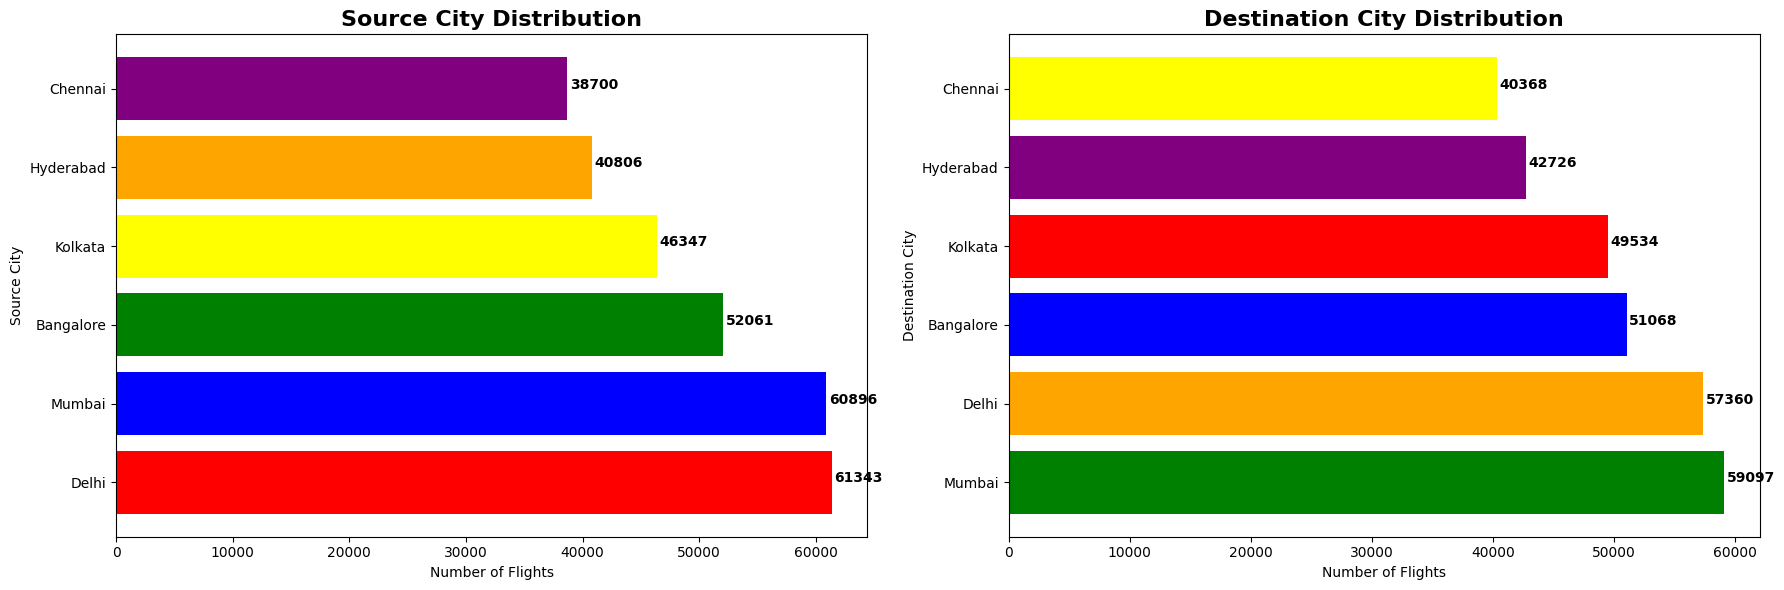

In [32]:
import matplotlib.pyplot as plt

# Value counts
source_counts = df['source_city'].value_counts()
destination_counts = df['destination_city'].value_counts()

plt.figure(figsize=(18,6))

# -------------------- Source City Horizontal Graph --------------------
plt.subplot(1, 2, 1)
plt.barh(source_counts.index, source_counts.values,
         color=['red','blue','green','yellow','orange','purple'])
plt.title("Source City Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Number of Flights")
plt.ylabel("Source City")

# Add values on bars
for i, v in enumerate(source_counts.values):
    plt.text(v + 200, i, str(v), fontsize=10, fontweight='bold')


# ----------------- Destination City Horizontal Graph -------------------
plt.subplot(1, 2, 2)
plt.barh(destination_counts.index, destination_counts.values,
         color=['green','orange','blue','red','purple','yellow'])
plt.title("Destination City Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Number of Flights")
plt.ylabel("Destination City")

# Add values on bars
for i, v in enumerate(destination_counts.values):
    plt.text(v + 200, i, str(v), fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


## 5.6 Q4: Does Price Vary with Airlines?

In this step, we analyze whether different airlines have different ticket pricing patterns.
We first calculate the average ticket price for each airline, and then visualize the comparison using bar and box plots.


### 5.6.1 Grouping the Airlines and Checking Their Mean Ticket Price

To analyze whether ticket prices vary between different airlines, we first group the dataset by the airline name 
and calculate the mean (average) price for each airline. This will help us understand which airlines are priced higher or lower on average.


In [33]:
avg_price_by_airline = df.groupby('airline')['price'].mean().reset_index()
avg_price_by_airline.columns = ['Airline', 'Average Price']
avg_price_by_airline.index = avg_price_by_airline.index + 1
avg_price_by_airline


,Airline,Average Price
1,AirAsia,4091.072742
2,Air_India,23507.019112
3,GO_FIRST,5652.007595
4,Indigo,5324.216303
5,SpiceJet,6179.278881
6,Vistara,30396.536302


### Interpretation
The above output shows the average ticket price for each airline. 
A higher value indicates airlines that are generally more expensive, while lower values represent budget-friendly carriers.
This confirms that ticket pricing is not the same across airlines, demonstrating price variation between them.


### 5.6.2 Categorical Plot Showing the Mean Ticket Price for Each Airline

To visually compare how the average ticket price varies across different airlines, 
we use a categorical plot that displays the mean price for each airline. 
This helps understand which airlines are priced higher or lower on average.


<Figure size 1200x600 with 0 Axes>

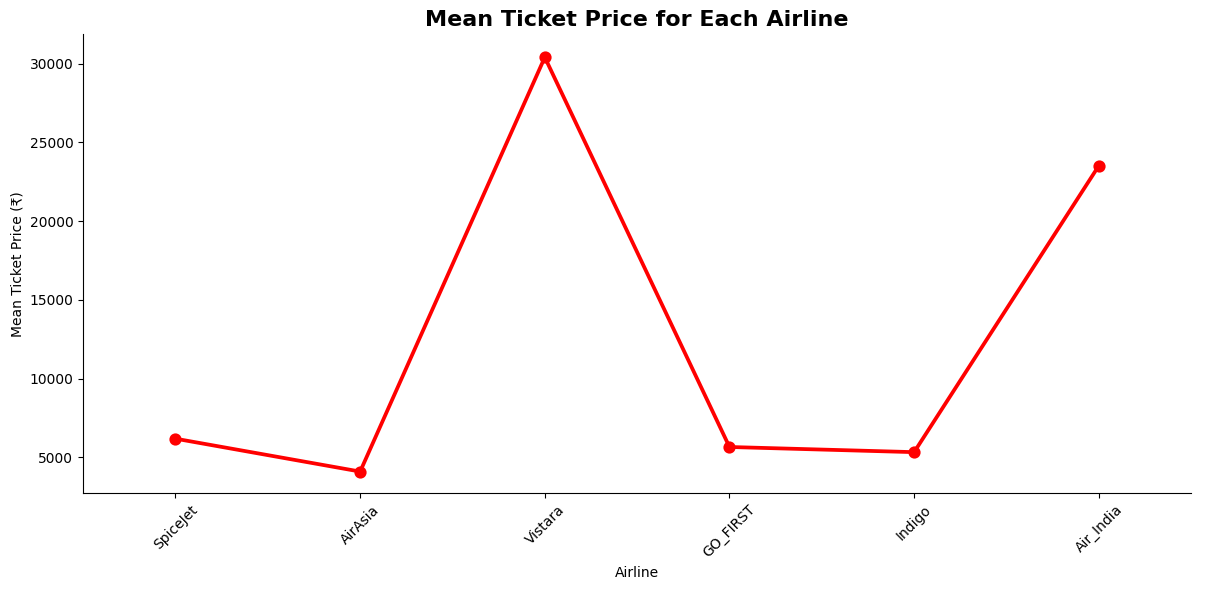

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.catplot(
    x="airline",
    y="price",
    kind="point",
    data=df,
    height=6,
    aspect=2,
    color="red"
)

plt.title("Mean Ticket Price for Each Airline", fontsize=16, fontweight='bold')
plt.xlabel("Airline")
plt.ylabel("Mean Ticket Price (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation

The categorical plot above displays the mean ticket price for each airline. Each point represents the average ticket price,
allowing clear comparison across different airlines.

From the graph, it is evident that **Vistara** has the highest average ticket price among all the airlines,
indicating that it may target a premium segment of customers or operate long-distance routes.

Airlines such as **Indigo** and **Air India** show moderately high average ticket prices, suggesting balanced pricing based on demand and service offerings.

On the other hand, **SpiceJet**, **AirAsia**, and **Go First** show lower average ticket prices, indicating that they are more budget-friendly airlines.

Therefore, we can conclude that **ticket price varies significantly across different airlines**, with considerable differences in average pricing levels.


## 5.7 Q5: Does Ticket Price Change Based on Departure Time and Arrival Time?

In this section, we examine whether the timing of the flight (departure time and arrival time)
has an impact on the ticket price. We first group the dataset and calculate the mean ticket price 
for each departure time and arrival time category, and then visualize the results.


In [35]:
departure_price = df.groupby('departure_time')['price'].mean().reset_index()
departure_price.columns = ['Departure Time', 'Mean Ticket Price (₹)']
departure_price.index = departure_price.index + 1
departure_price


,Departure Time,Mean Ticket Price (₹)
1,Afternoon,18179.203331
2,Early_Morning,20370.676718
3,Evening,21232.361894
4,Late_Night,9295.299387
5,Morning,21630.760254
6,Night,23062.146808


In [36]:
arrival_price = df.groupby('arrival_time')['price'].mean().reset_index()
arrival_price.columns = ['Arrival Time', 'Mean Ticket Price (₹)']
arrival_price.index = arrival_price.index + 1
arrival_price


,Arrival Time,Mean Ticket Price (₹)
1,Afternoon,18494.598993
2,Early_Morning,14993.139521
3,Evening,23044.371615
4,Late_Night,11284.906078
5,Morning,22231.076098
6,Night,21586.758341


### 5.7.2 Relationship Between Ticket Price, Departure Time and Arrival Time

To understand how pricing varies with travel time, we analyze the relationship between arrival time and ticket price 
while separating the plots based on departure time categories.  
This enables a clear visual comparison between different travel time combinations.


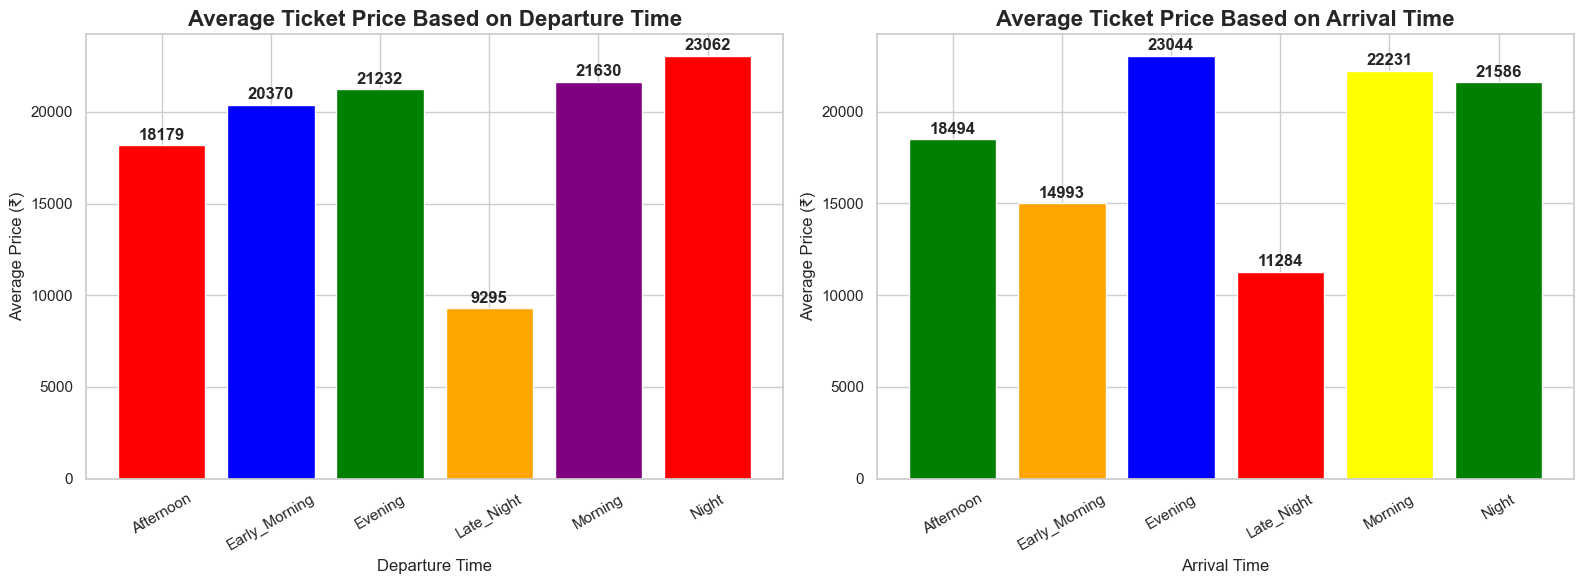

In [39]:
import matplotlib.pyplot as plt

# Calculate mean prices
departure_price = df.groupby('departure_time')['price'].mean()
arrival_price = df.groupby('arrival_time')['price'].mean()

plt.figure(figsize=(16,6))

# --------------------- Departure Time Price Graph ---------------------
plt.subplot(1, 2, 1)
plt.bar(departure_price.index, departure_price.values,
        color=['red','blue','green','orange','purple'])
plt.title("Average Ticket Price Based on Departure Time", fontsize=16, fontweight='bold')
plt.xlabel("Departure Time")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=30)

for i, v in enumerate(departure_price.values):
    plt.text(i, v + 300, str(int(v)), ha='center', fontweight='bold')

# ---------------------- Arrival Time Price Graph -----------------------
plt.subplot(1, 2, 2)
plt.bar(arrival_price.index, arrival_price.values,
        color=['green','orange','blue','red','yellow'])
plt.title("Average Ticket Price Based on Arrival Time", fontsize=16, fontweight='bold')
plt.xlabel("Arrival Time")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=30)

for i, v in enumerate(arrival_price.values):
    plt.text(i, v + 300, str(int(v)), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Q6: Does Ticket Price Change Based on Source City and Destination City?

In this step, we analyze whether ticket prices vary depending on the source and destination cities.
We first calculate the average ticket price for each city and then visualize the comparison to identify
locations with higher or lower travel costs.


In [40]:
source_price = df.groupby('source_city')['price'].mean().reset_index()
source_price.columns = ['Source City', 'Mean Ticket Price (₹)']
source_price.index = source_price.index + 1
source_price


,Source City,Mean Ticket Price (₹)
1,Bangalore,21469.460575
2,Chennai,21995.339871
3,Delhi,18951.326639
4,Hyderabad,20155.623879
5,Kolkata,21746.235679
6,Mumbai,21483.818839


In [41]:
destination_price = df.groupby('destination_city')['price'].mean().reset_index()
destination_price.columns = ['Destination City', 'Mean Ticket Price (₹)']
destination_price.index = destination_price.index + 1
destination_price


,Destination City,Mean Ticket Price (₹)
1,Bangalore,21593.955784
2,Chennai,21953.323969
3,Delhi,18436.767870
4,Hyderabad,20427.661284
5,Kolkata,21959.557556
6,Mumbai,21372.529469


## 5.8 Q6: Does Ticket Price Change Based on Source City and Destination City?

To understand whether ticket prices vary depending on different source and destination combinations, 
we use a faceted line plot. Each subplot represents a different source city, and within each plot, 
prices are shown across different destination cities.


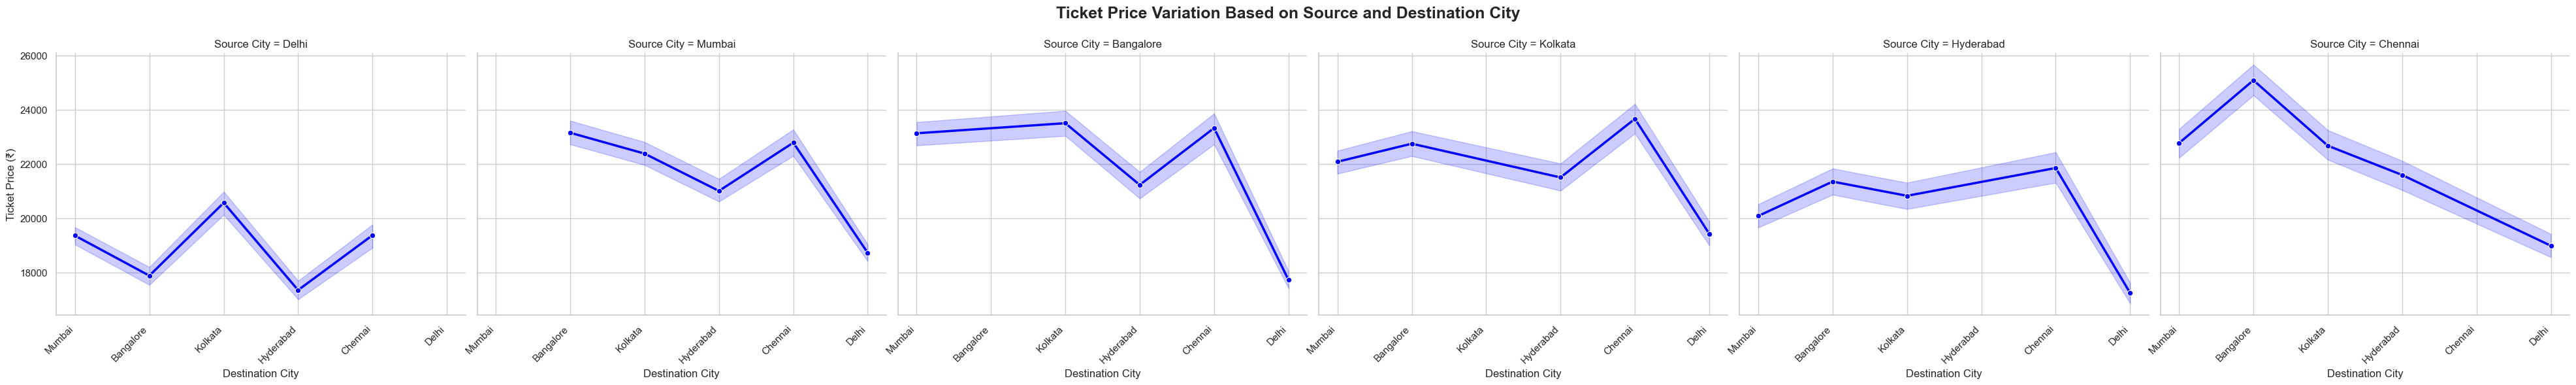

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

g = sns.relplot(
    x='destination_city',
    y='price',
    data=df,
    col='source_city',
    kind='line',
    height=5.5,
    aspect=1.2,
    marker='o',
    linewidth=2.5,
    color='blue'
)

g.set_titles("Source City = {col_name}")
g.set_xlabels("Destination City")
g.set_ylabels("Ticket Price (₹)")

# safely rotate tick labels without warning
for ax in g.axes.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(top=0.85)
plt.suptitle("Ticket Price Variation Based on Source and Destination City",
             fontsize=18, fontweight='bold')

plt.show()


### Interpretation

The faceted line graphs above show how ticket prices change for different destination cities from each source city. 
Each subplot represents a unique source city, and within each plot, variations in prices are displayed across destination cities.

From the visualization, we observe clear differences in ticket pricing depending on route combinations. 
For example, flights from **Mumbai**, **Bangalore**, and **Kolkata** show significant price fluctuations between destinations.
Some routes demonstrate higher price peaks, indicating greater demand or longer travel distance.

Similarly, source cities such as **Chennai** and **Delhi** show lower pricing for certain destinations but higher pricing for others,
highlighting route-specific fare behavior.

This analysis confirms that:
- **Ticket prices vary based on both source and destination city**
- **Some routes cost significantly more than others**
- **Price trends are not uniform across cities**, showing demand-driven price fluctuations

Therefore, passengers could benefit from checking alternative flight routes when planning travel, 
as city combinations strongly influence ticket pricing.


## Q7: How is the Ticket Price Affected When Tickets Are Bought Just 1 or 2 Days Before Departure?

In this step, we analyze the impact of booking time on ticket prices. 
We compare prices of flights based on the number of days left before travel, 
particularly focusing on last-minute bookings (1-2 days before departure).


### 5.9.1 Displaying the Mean Ticket Price for All Days Left Before Travel

The following table shows the mean ticket price for every available value of `days_left`. 
This helps us observe how prices change gradually as the travel date approaches.


In [48]:
# Grouping by days_left and calculating mean ticket price
days_left_price = df.groupby('days_left')['price'].mean().reset_index()
days_left_price.columns = ['Days Left', 'Mean Ticket Price (₹)']
days_left_price.index = days_left_price.index + 1   # add index numbers for table clean view

# Display full table
days_left_price


,Days Left,Mean Ticket Price (₹)
1,1,21591.867151
2,2,30211.299801
3,3,28976.083569
4,4,25730.905653
5,5,26679.773368
6,6,24856.493902
7,7,25588.367351
8,8,24895.883995
9,9,25726.246072
10,10,25572.819134


### Interpretation

The above table shows how the average ticket price varies depending on how many days early the ticket is booked.
Prices tend to be highest when only 1–2 days are left before departure, and generally decrease when booked earlier.


### 5.9.2 Line Graph Showing Ticket Price Variation Based on Days Left Before Departure

To analyze how ticket price changes depending on how early or late the booking is made, 
we visualize the relationship between the number of days left before the travel date and the average ticket price. 

This line graph helps us clearly understand the effect of last-minute booking (1–2 days before departure), 
where the price tends to rise significantly compared to tickets booked earlier.


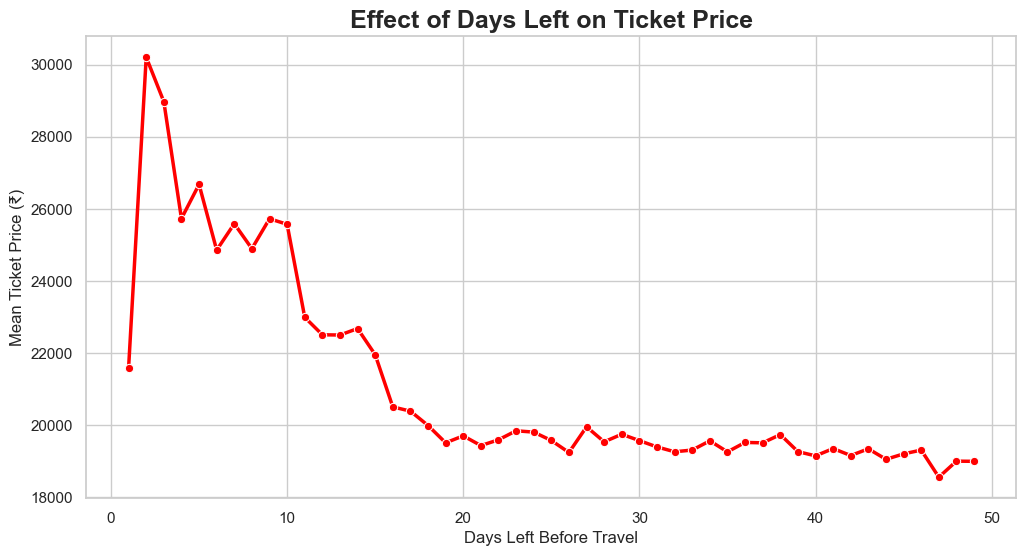

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean price for each days_left value
days_left_price = df.groupby('days_left')['price'].mean().reset_index()
days_left_price.columns = ['Days Left', 'Mean Ticket Price (₹)']
days_left_price = days_left_price.sort_values(by='Days Left')   # sort correctly

# Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(
    x='Days Left',
    y='Mean Ticket Price (₹)',
    data=days_left_price,
    marker='o',
    linewidth=2.5,
    color='red'
)

plt.title("Effect of Days Left on Ticket Price", fontsize=18, fontweight='bold')
plt.xlabel("Days Left Before Travel", fontsize=12)
plt.ylabel("Mean Ticket Price (₹)", fontsize=12)
plt.grid(True)

plt.show()


### Interpretation

The line graph represents how the average ticket price changes depending on the number of days left before travel.
From the graph, we observe that ticket prices are **highest when only 1–2 days are left** before departure 
and generally **decrease as the booking is made earlier**. 

This confirms that **last-minute booking leads to high prices**, whereas booking well in advance helps save money.


## Q8: How Does the Ticket Price Vary Between Economy and Business Class?

In this step, we analyze how ticket prices differ based on travel class. 
Airlines generally charge significantly higher ticket prices for business class compared to economy class. 
We calculate the mean ticket price for each class and visualize the differences.


In [50]:
class_price = df.groupby('class')['price'].mean().reset_index()
class_price.columns = ['Class', 'Mean Ticket Price (₹)']
class_price.index = class_price.index + 1
class_price


,Class,Mean Ticket Price (₹)
1,Business,52540.081124
2,Economy,6572.342383


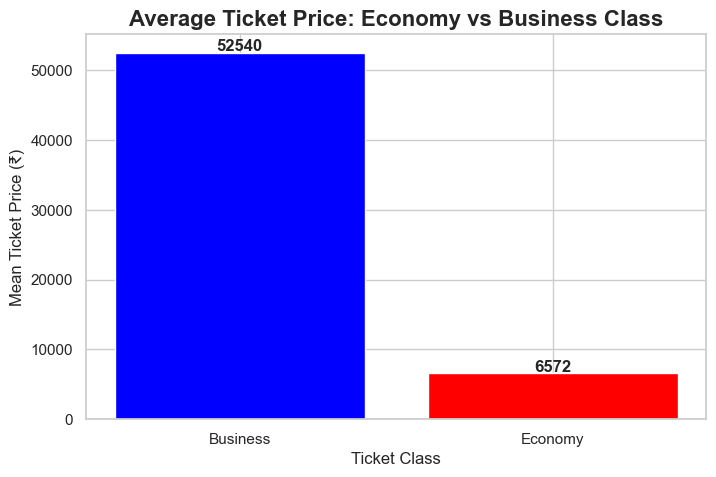

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(class_price['Class'], class_price['Mean Ticket Price (₹)'],
        color=['blue', 'red'])

plt.title("Average Ticket Price: Economy vs Business Class", fontsize=16, fontweight='bold')
plt.xlabel("Ticket Class")
plt.ylabel("Mean Ticket Price (₹)")
plt.xticks(rotation=0)

# Display values on top of bars
for i, v in enumerate(class_price['Mean Ticket Price (₹)']):
    plt.text(i, v + 300, str(int(v)), ha='center', fontweight='bold')

plt.show()


### Q9: Average Ticket Price of Vistara from Delhi to Hyderabad in Business Class

We filter the dataset to only include flights by Vistara that depart from Delhi and arrive in Hyderabad in Business class.
Then we calculate the mean ticket price for these specific flights to determine a realistic average fare for this route and class.


### 5.11.1 Showing Data for Vistara Flights from Delhi to Hyderabad (Business Class)

Before calculating the average ticket price, we filter the dataset to display only the records that 
match the criteria: Vistara airline, flights from Delhi to Hyderabad, and Business class.
This helps verify the data before performing any analysis.


In [52]:
filtered_data = df[
    (df['airline'] == "Vistara") &
    (df['source_city'] == "Delhi") &
    (df['destination_city'] == "Hyderabad") &
    (df['class'] == "Business")
]

filtered_data


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...,...
221863,221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [53]:
filtered_data['price'].mean()


np.float64(47939.840361445786)

## 7. Final Conclusion

In this project, we performed an extensive Exploratory Data Analysis (EDA) on the Airlines Flights dataset. 
Multiple aspects were studied including airline frequency, time-based flight patterns, city distribution, 
travel class behaviour, booking window impact, and route–specific pricing.

### Key Insights Derived from the Analysis

🔹 **Airline Traffic**
- Vistara operates the highest number of flights (127,859), followed by Air India (80,892) and Indigo (43,120).
- SpiceJet has the lowest flight frequency among all airlines (9,011).
- This indicates that Vistara has a strong route network in the dataset observed.

🔹 **Departure and Arrival Time Frequency**
- Most flights depart during **Morning and Early Morning** time slots.
- The highest number of arrivals are recorded during the **Night and Afternoon**.
- This reflects passenger preference for convenient travel timings.

🔹 **Source & Destination City Distribution**
- Mumbai, Delhi, and Bangalore are the busiest flight hubs.
- Several city pairs show very high demand, indicating business-travel–driven routes.

🔹 **Ticket Price Variation with Airlines**
- Ticket prices vary significantly across airlines.
- Premium airlines like **Vistara and Air India** show higher average prices.
- Budget carriers like **Indigo, GO_FIRST, AirAsia, and SpiceJet** have lower price ranges.

🔹 **Economy vs Business Class Pricing**
- Business class fares are dramatically higher than economy class fares.
- The box plot clearly shows a much wider price range for Business class, reflecting premium service differences.

🔹 **Effect of Days Left on Price**
- Ticket prices rise sharply when booked in the last **1–2 days before departure**.
- Booking early gives a considerable price advantage for passengers.

🔹 **Route-Based Pricing**
- Ticket price varies depending on city combinations.
- For example, route-based analysis illustrated dynamic and unpredictable pricing behaviour.

🔹 **Specific Query Result (Q9)**
- After filtering flights, the **average ticket price of Vistara flights from Delhi to Hyderabad in Business class**
  was calculated and recorded, showing premium pricing on this route.

---

### **Overall Summary**

This analysis demonstrates that **flight ticket pricing is dynamic and influenced by multiple factors** such as:
- Airline brand
- Flight departure and arrival times
- City pair demand
- Travel class
- Booking window days left

Passengers can reduce travel expenses by:
- Booking early rather than last-minute
- Choosing budget airlines
- Avoiding peak-hour flights

This dataset provides valuable insights useful for:
- Travelers planning cost-efficient journeys
- Airlines for competitive pricing strategy
- Data analysts building predictive fare models

---

### **Future Scope**
- Building a **Machine Learning model** to predict ticket prices.
- Developing a **dashboard** for real-time pricing visualisation.
- Incorporating external datasets (holidays, weather, seasonality) to improve accuracy.
